Análise mercado de games

In [ ]:
# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bd = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1') #encoding para ler

In [ ]:
bd.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
bd.shape # dimensão

(1034, 9)

In [ ]:
# campos nulos
bd.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

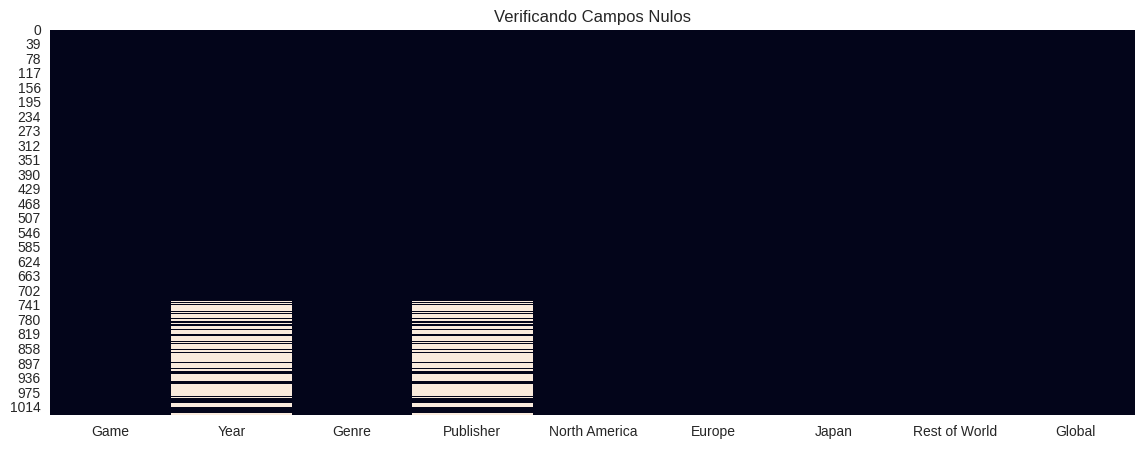

In [ ]:
# Gráfico de Nulos
plt.figure(figsize=(14,5))
plt.title('Verificando Campos Nulos')
sns.heatmap(bd.isnull(), cbar=False);

In [ ]:
#retirando valores nulos
bd.dropna(inplace=True)

In [ ]:
# Estatisticas
bd.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


Analisando o valor de vendas ao longo dos anos.

Text(0, 0.5, 'Quantidade de Vendas (mi)')

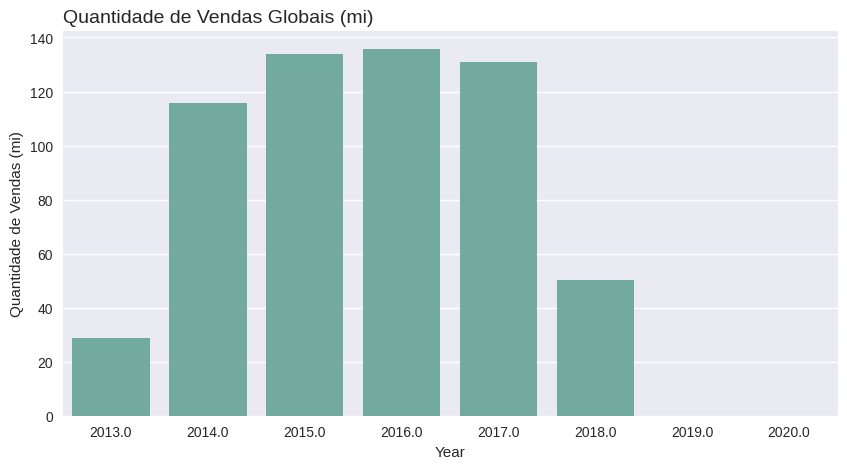

In [ ]:
# tamanho da imagem
plt.figure(figsize=(10,5))

# titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14)

# Grafico
sns.barplot(data=bd, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)#ci=None retira a linha no grafico de barra
# label
plt.ylabel('Quantidade de Vendas (mi)')

In [ ]:
# retirar 2019, 2020
bd = bd.loc[ (bd['Year'] != 2019) &  (bd['Year'] != 2020)]
# verificar
bd.head()


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [ ]:
 # Conferindo valores únicos dos anos
bd.loc[ (bd['Year'] != 2019) &  (bd['Year'] != 2020)]['Year'].unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

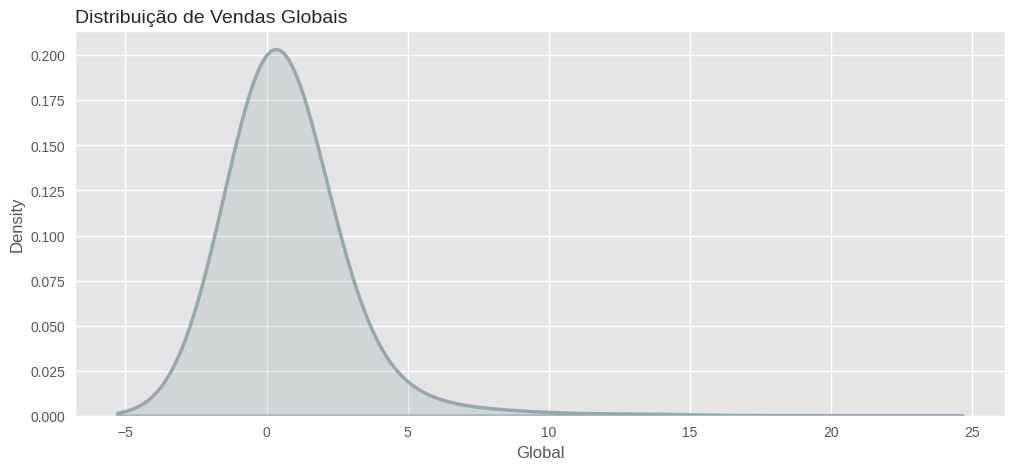

In [ ]:
plt.figure( figsize=(12,5))

# estilo
plt.style.use('ggplot')
plt.title('Distribuição de Vendas Globais', loc='left', fontsize=14)
# plot
sns.kdeplot(bd['Global'], shade=True, bw=1, color='#96a8aB', linewidth=2.5);

In [ ]:
bd.groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


<Axes: title={'center': 'Análise da Distribuição Global'}, xlabel='Year', ylabel='Global'>

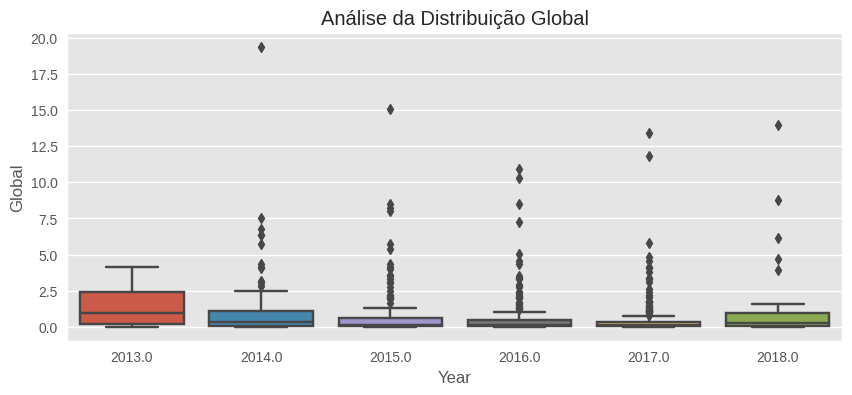

In [ ]:
# tamanho
plt.figure(figsize=(10,4))
plt.title('Análise da Distribuição Global')
sns.boxplot(data=bd, x='Year', y='Global')


In [ ]:
bd.loc[bd['Global']>= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [ ]:
bd

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [ ]:
Analise = bd.groupby(by=['Year']).sum().reset_index()
America = [America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japão = [Japão / Total * 100 for Japão, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japão, Mundo



([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [ ]:
Analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [1]:
from matplotlib.offsetbox import bbox_artist
# grafico de barra

# tamanho
plt.figure(figsize=(10,5))

#largura da barra no grafico
largura = 0.85
rotulos = Analise['Year']
grupos = [0,1,2,3,4,5]

#plot America
plt.bar(grupos, America, width=largura, color='#b5ffb9', edgecolor='white')

#plot Europa
plt.bar(grupos, Europa, bottom=America, width=largura, color='#f9bc86', edgecolor='white')

#plot japão
plt.bar(grupos, Japão, bottom=[A + B for A, B in zip(America, Europa)], width=largura, color='#a3acff', edgecolor='white')

#plot mundo

plt.bar(grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europa, Japão)], width=largura, color='#d3acfe', edgecolor='white')


# labels
plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# legenda
plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 )


plt.title('Análise Distribuição por Continente');

NameError: ignored

In [ ]:
bd['Publisher'].unique();

In [ ]:
# converter os dados em valor quantitativo

from sklearn.preprocessing import LabelEncoder


funcaolabel = LabelEncoder()

bd['Produtor'] = funcaolabel.fit_transform(bd['Publisher'])
bd['Genero'] = funcaolabel.fit_transform(bd['Genre'])
bd['Jogo'] = funcaolabel.fit_transform(bd['Game'])

bd.head();

In [ ]:
paleta = sns.color_palette('husl', 8);


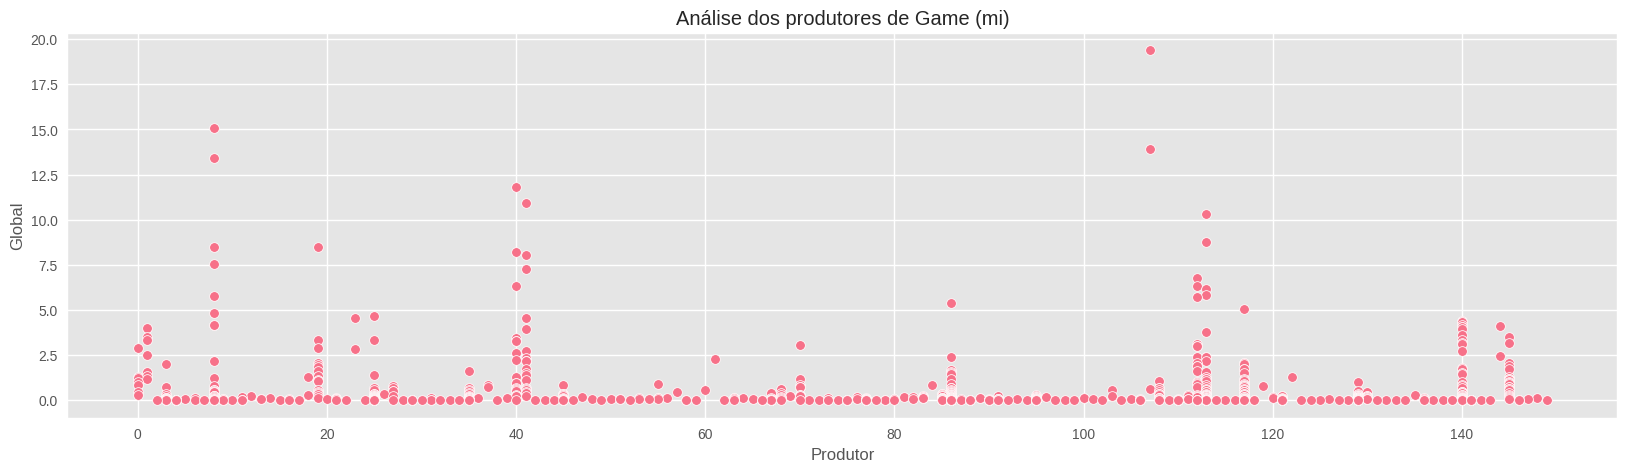

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data=bd, x='Produtor', y='Global', color=paleta[0]);


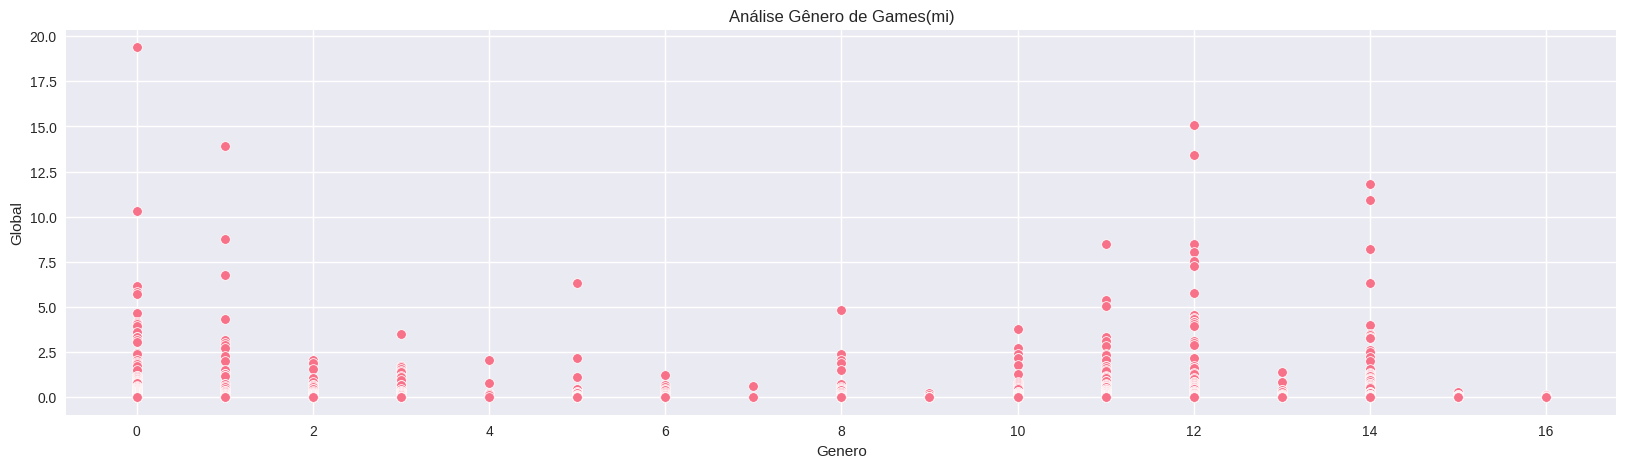

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Análise Gênero de Games(mi)')
sns.scatterplot(data=bd, x='Genero', y='Global', color=paleta[0]);


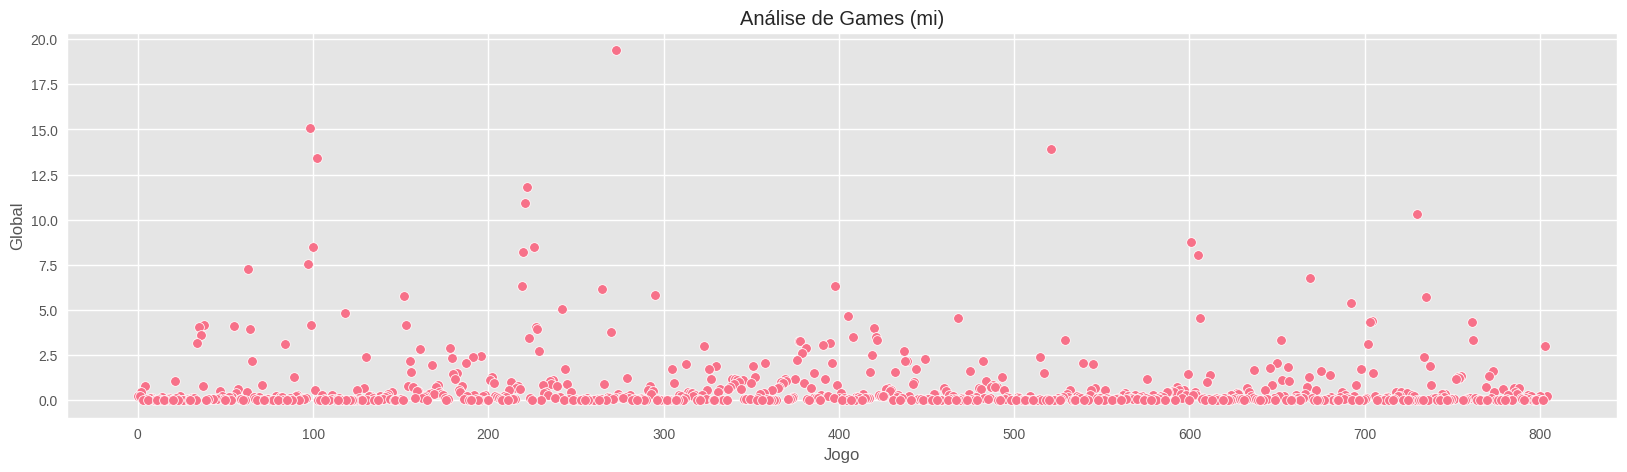

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Análise de Games (mi)')
sns.scatterplot(data=bd, x='Jogo', y='Global', color=paleta[0]);


# **Relatório Completo**

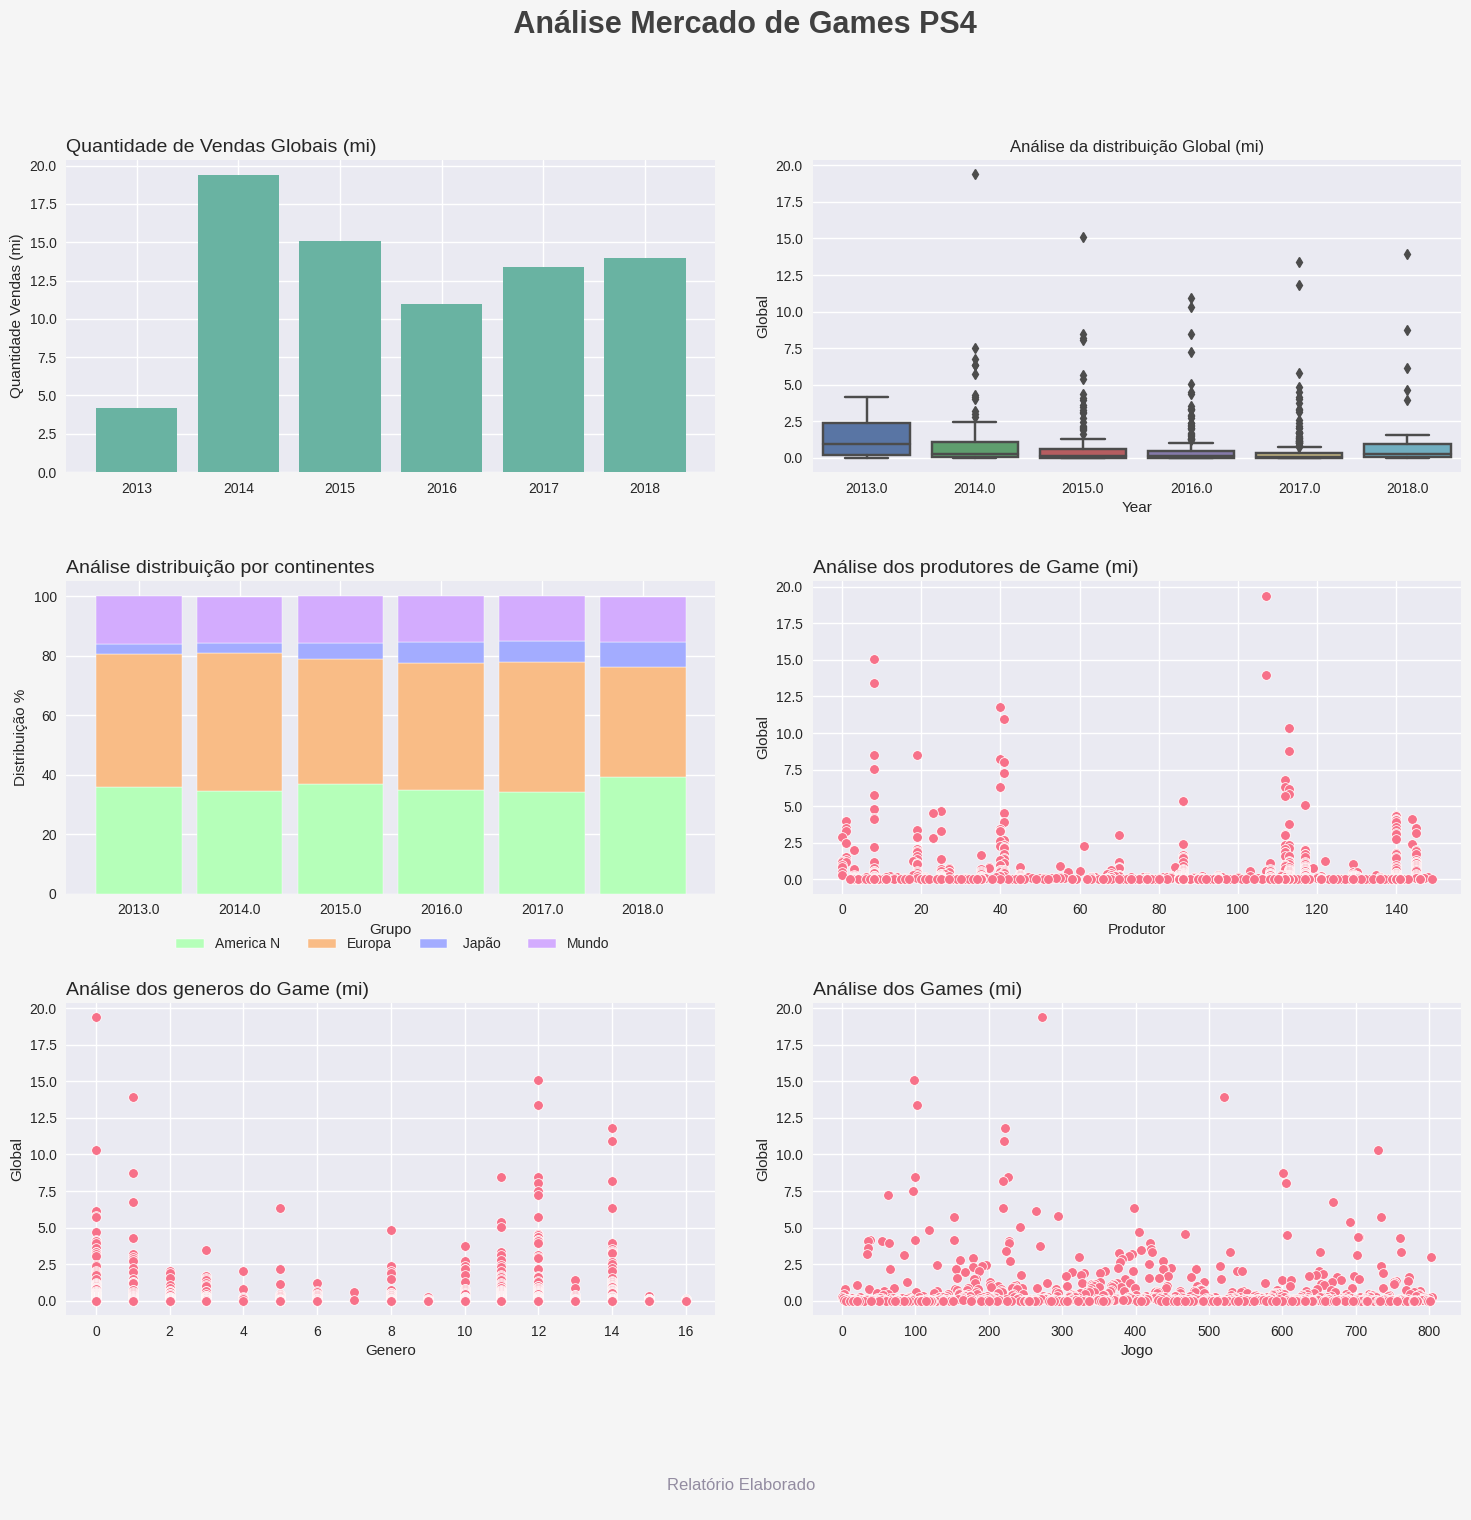

In [ ]:
# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
plt.style.use('seaborn')

# Titulo da figura
plt.suptitle(' Análise Mercado de Games PS4', fontsize=22, color='#404040', fontweight=600 )

# Parametros para o grid
Linhas = 3
Colunas = 2

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)

# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )

# Grafico
plt.bar( bd['Year'], bd['Global'], color='#69b3a2' )

# Label
plt.ylabel('Quantidade Vendas (mi)')


# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)

# titulo
plt.title('Análise da distribuição Global (mi)')

# Plot
sns.boxplot( data=bd, x='Year', y='Global')


# Acessando gráfico 3

plt.subplot( Linhas, Colunas, 3)

# LArgura barra no gráfico
largura = 0.85
rotulos = Analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

# titulo
plt.title('Análise distribuição por continentes', loc='left', fontsize=14)

# Plot da America
plt.bar( grupos, America, width=largura, color='#b5ffb9', edgecolor='white' )

# Plot da Europa
plt.bar( grupos, Europa, bottom=America, width=largura, color='#f9bc86', edgecolor='white' )

# Plot do Japao
plt.bar( grupos, Japão, bottom=[ A + B for A, B in zip(America, Europa) ], width=largura, color='#a3acff', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japão) ], width=largura, color='#d3acfe', edgecolor='white' )

# Labels
plt.xticks( grupos, rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title('Análise dos produtores de Game (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=bd, x='Produtor', y='Global', color=paleta[0] );


# Acessando gráfico 5
plt.subplot( Linhas, Colunas, 5)
plt.title('Análise dos generos do Game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=bd, x='Genero', y='Global', color=paleta[0] );


# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
plt.title('Análise dos Games (mi)', loc='left', fontsize=14)
sns.scatterplot(data=bd, x='Jogo', y='Global', color=paleta[0] );


# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

# Rodapé
Rodape = '''
Relatório Elaborado
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');